## Import Library

In [3]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from Faster_RCNN.parameter import DATA_DIR

plt.style.use('ggplot')
mpl.rcParams.update({'font.size' : 14})
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## Look Dataset

In [4]:
train_csv = pd.read_csv(f'{DATA_DIR}/train.csv')
train_csv.shape

(3657, 3)

In [5]:
train_csv

,image_name,BoxesString,domain
0,7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...,949 967 999 994;368 649 443 685;118 280 185 33...,0
1,0e37ccf64ccbd456f07dcfe110133018f324e5bdf63b08...,691 60 730 119;838 901 897 969;477 444 526 489...,0
2,89e0aa4148f0a9ff01e9e55c5a2bcbe294150444dbe43c...,953 178 1023 244;265 164 326 228;657 790 689 8...,0
3,fed8dde94c7a51de782b71f45c9115cdf7208cf7f33eee...,801 402 882 459;214 924 271 1023;299 726 360 7...,0
4,8a593fc7894c37145d302bce36822bf21725088cf17b23...,187 887 294 1003;631 343 679 386;337 719 402 7...,0
...,...,...,...
3652,a7a7fc8914a720073e2bad3f2981a869ea54a0eba3adde...,950 137 1024 267;375 545 478 621;49 155 203 21...,17
3653,303cfef6aa1483f7377292eac942b2c80ef17d8ab347ed...,624 897 696 960;759 534 847 665;656 975 730 10...,17
3654,99ecf64fab884c431969a12eb28ad29041aa190498d3ae...,318 354 385 414;528 0 597 50;674 948 754 1024;...,17
3655,a543d8ab29e27fbd7fd96fa5f48ed2e84592c1372583bc...,734 56 822 134;1 661 151 803;942 613 1024 708;...,17


In [6]:
train_csv.info

<bound method DataFrame.info of                                              image_name  \
0     7b73239dfd89b06c03e1be81cc5074ec47ae048305ec63...   
1     0e37ccf64ccbd456f07dcfe110133018f324e5bdf63b08...   
2     89e0aa4148f0a9ff01e9e55c5a2bcbe294150444dbe43c...   
3     fed8dde94c7a51de782b71f45c9115cdf7208cf7f33eee...   
4     8a593fc7894c37145d302bce36822bf21725088cf17b23...   
...                                                 ...   
3652  a7a7fc8914a720073e2bad3f2981a869ea54a0eba3adde...   
3653  303cfef6aa1483f7377292eac942b2c80ef17d8ab347ed...   
3654  99ecf64fab884c431969a12eb28ad29041aa190498d3ae...   
3655  a543d8ab29e27fbd7fd96fa5f48ed2e84592c1372583bc...   
3656  618d3e5f3a932a9b6c877976ce9e512a6229b63b38bab8...   

                                            BoxesString  domain  
0     949 967 999 994;368 649 443 685;118 280 185 33...       0  
1     691 60 730 119;838 901 897 969;477 444 526 489...       0  
2     953 178 1023 244;265 164 326 228;657 790 689 8...      

In [7]:
train_csv.describe(include='all')

,image_name,BoxesString,domain
count,3657,3657,3657.000000
unique,3655,3608,NaN
top,8ec1474b9cdc0fd870b443439daa56660c57140c051a8a...,no_box,NaN
freq,2,50,NaN
mean,NaN,NaN,11.134810
std,NaN,NaN,4.680507
min,NaN,NaN,0.000000
25%,NaN,NaN,6.000000
50%,NaN,NaN,12.000000
75%,NaN,NaN,15.000000


In [8]:
co = train_csv['domain'].value_counts()

In [9]:
co

12    747
15    588
5     448
17    432
14    401
10    204
2     176
6     160
16     98
9      82
13     66
1      60
7      60
8      32
11     30
0      29
4      24
3      20
Name: domain, dtype: int64

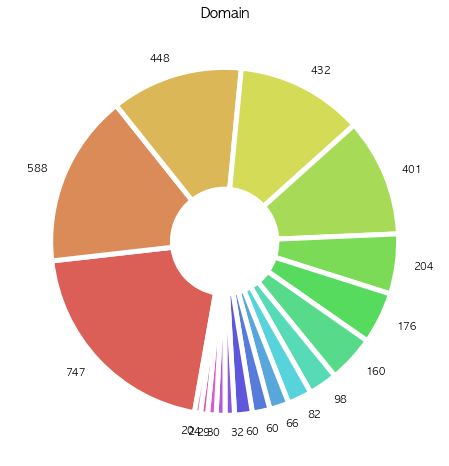

In [12]:
colors = sns.color_palette('hls',len(co)) ## 라벨의 개수 만큼 색상 리스트 생성 
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

subm_fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
subm_fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
subm_ax = subm_fig.add_subplot() ## 프레임 생성
 
plt.pie(co, labels=co, startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.title("Domain")
plt.show()

## Train

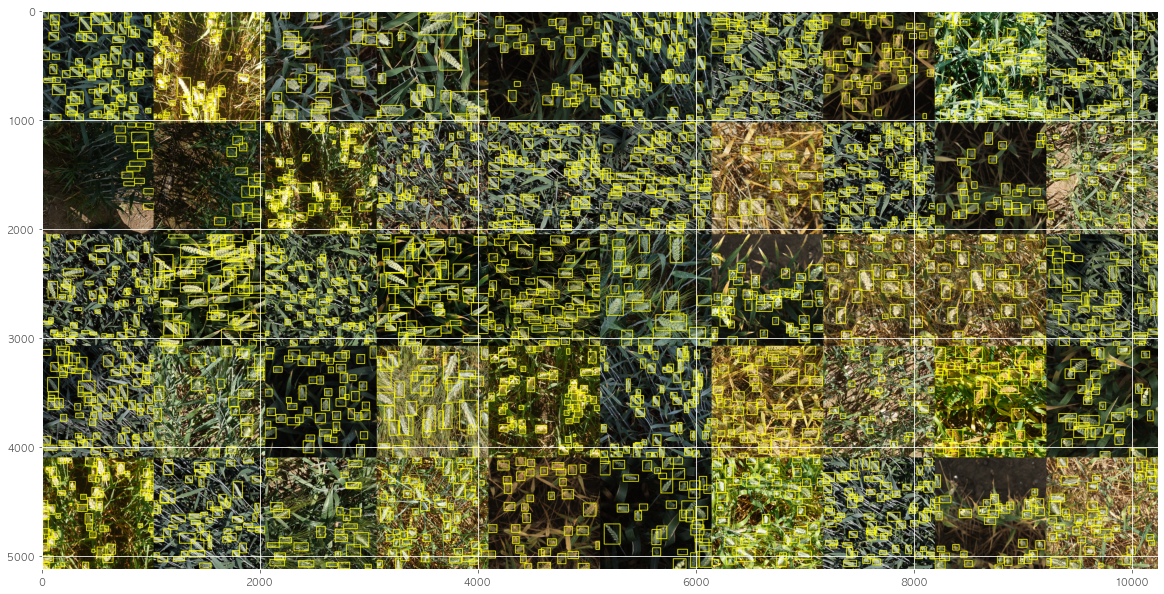

In [11]:
from Faster_RCNN.dataset import WheatDataset
import matplotlib.pyplot as plt
import cv2
import random

dataset = WheatDataset(transform=None)

hlines = []
for i in range(10):
  vlines = []
  for j in range(5):
    img , bboxes , metadata = dataset[random.randint(0,len(dataset))]

    for (x,y,xx,yy) in bboxes:
      cv2.rectangle(img,(int(x.item()),int(y.item())),(int(xx.item()),int(yy.item())),(255,255,0),5)

    vlines.append(img)
  hlines.append(cv2.vconcat(vlines))

final_img = cv2.hconcat(hlines)

fig ,ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(final_img)